In [99]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log

from IPython.display import display
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [58]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 2

$$ \left\{
    \begin{array}{ll}
        \frac{dx}{dt} = x.(\alpha − \beta.y) \\
        \frac{dy}{dt} = -y.(\gamma - \delta.x) 
    \end{array}
    \right. $$
    
$$ dx = x(t+dt) - x(t) $$
$$ dy = y(t+dt) - y(t) $$

In [59]:
xmax = 4
ymax = 4
dx = 0.2
dy = 0.2
Nx = int(xmax/dx)+1
Ny = int(ymax/dy)+1

dt = 0.2

#### Question 1

#### Question 2

In [60]:
X = np.linspace(0, xmax, Nx)
Y = np.linspace(0, ymax, Ny)
X, Y = np.meshgrid(X, Y)
U = X*(1+dt*(alpha-beta*Y))
V = Y*(1-dt*(gamma-delta*X))

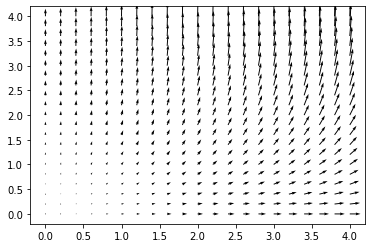

In [61]:
# champ de vecteur
plt.quiver(X,Y,U,V);

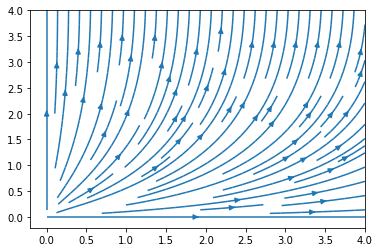

In [62]:
# portrait de phase
plt.streamplot(X,Y,U,V);

#### Question 3

#### Question 4

#### Question 5

In [63]:
def H(x1, x2):
    return delta*x1 - gamma*log(x1) + beta*x2 - alpha*log(x2)

<ipython-input-63-de4b50f781c1>:2: RuntimeWarning: divide by zero encountered in log
  return delta*x1 - gamma*log(x1) + beta*x2 - alpha*log(x2)


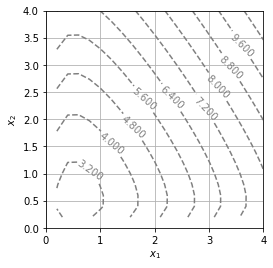

In [64]:
display_contour(
    H, 
    x=np.linspace(0, xmax, Nx), 
    y=np.linspace(0, ymax, Ny), 
    levels=10 # 10 levels, automatically selected
)

#### Question 6

In [65]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    N = int((tf-t0)/dt) + 1
    t = np.linspace(t0,tf,N)
    x = [x0]
    for i in range(N-1):
        x.append(x[i] + dt*f(t[i],x[i]))
    return t, np.array(x)

In [66]:
#test

#### Question 7

In [67]:
def LotkaVoltera(t,x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha-beta*x2) , -x2*(gamma-delta*x1)])

In [94]:
t,x = solve_euler_explicit(LotkaVoltera,np.array([1,1]),0.01,0,50)

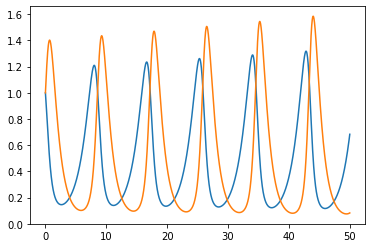

In [95]:
plt.plot(t,x);

In [96]:
proies = np.array([x[i][0] for i in range(x.shape[0])])
pred = np.array([x[i][1] for i in range(x.shape[0])])
proies, pred = np.meshgrid(proies,pred)
Z = H(proies,pred)

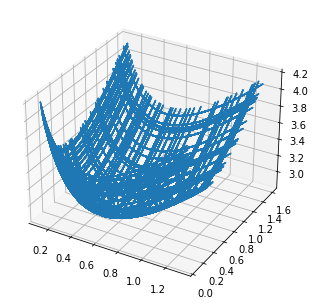

In [103]:
fig = figure()
ax = Axes3D(fig)
ax.plot_wireframe(proies,pred,Z);